# 1.数据预处理

## 1.1 数据读取

附件 1 语音业务用户满意度数据

In [1]:
import pandas as pd
data1 = pd.read_excel(r"F:\2022B\附件1语音业务用户满意度数据.xlsx").iloc[:,:55]
data1.head()

,用户id,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
0,1,10,6,6,6,1,-1,2,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
1,2,2,1,1,1,1,1,2,-1,4,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
2,3,10,7,7,7,1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
3,4,6,7,7,6,1,1,2,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
4,5,5,5,4,3,1,-1,2,-1,-1,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00


In [2]:
data1.info()
# 当前数据共5432条数据，55列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   用户id               5433 non-null   int64  
 1   语音通话整体满意度          5433 non-null   int64  
 2   网络覆盖与信号强度          5433 non-null   int64  
 3   语音通话清晰度            5433 non-null   int64  
 4   语音通话稳定性            5433 non-null   int64  
 5   是否遇到过网络问题          5433 non-null   int64  
 6   居民小区               5433 non-null   int64  
 7   办公室                5433 non-null   int64  
 8   高校                 5433 non-null   int64  
 9   商业街                5433 non-null   int64  
 10  地铁                 5433 non-null   int64  
 11  农村                 5433 non-null   int64  
 12  高铁                 5433 non-null   int64  
 13  其他，请注明             5433 non-null   int64  
 14  用户描述               275 non-null    object 
 15  手机没有信号             5433 non-null   int64  
 16  有信号无法拨通            5433 

## 1.2 缺失值处理

In [3]:
# 有缺失值的列
data1.columns[data1.isnull().sum() > 0]

Index(['用户描述', '用户描述.1', '重定向次数', '重定向驻留时长', '是否关怀用户', '是否去过营业厅',
       '是否4G网络客户（本地剔除物联网）', '终端品牌', '终端品牌类型', '外省流量占比', '是否5G网络客户', '是否实名登记用户',
       '客户星级标识', '当月欠费金额', '前第3个月欠费金额'],
      dtype='object')

<AxesSubplot:>

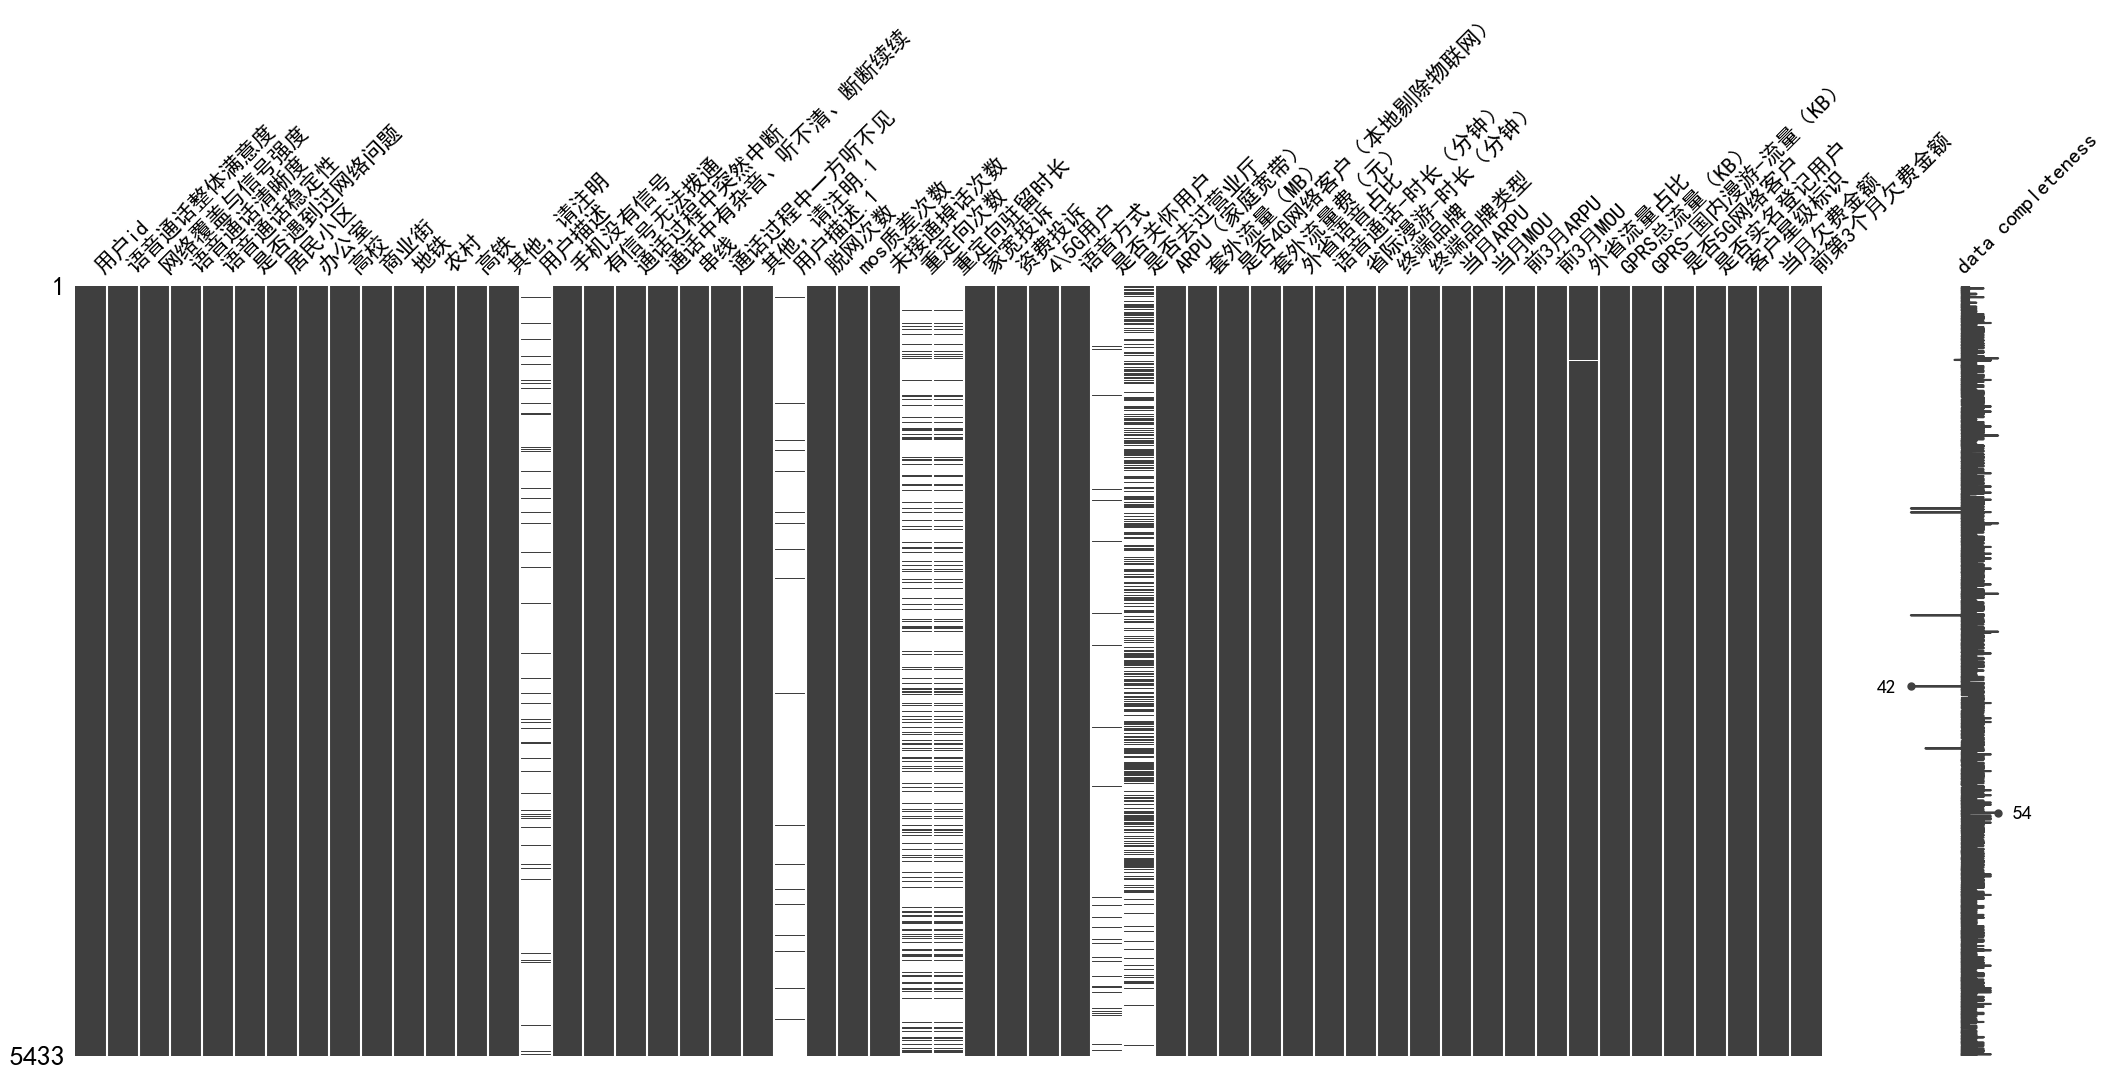

In [4]:
# 缺失值可视化 - 缺失值填充之前
import missingno as msno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
msno.matrix(data1, labels=True)

In [5]:
# 缺失值的处理方案 共15列有缺失列

# 个别缺失 9列 众数填充
# 查询填充的值
data1['是否4G网络客户（本地剔除物联网）'].isna().sum() # 共有5个缺失值
data1['是否4G网络客户（本地剔除物联网）'].value_counts() # 观察该特征‘是’超过99.28%，几乎认为是冗余特征，先用‘是’来填充
# 众数填充
data1['是否4G网络客户（本地剔除物联网）'].fillna('是',inplace = True)
data1['终端品牌'].fillna('苹果',inplace = True)
data1['终端品牌类型'].fillna('A2223',inplace = True)
data1['外省流量占比'].fillna(0.00,inplace = True)
data1['是否5G网络客户'].fillna('否',inplace = True)
data1['是否实名登记用户'].fillna('否',inplace = True)
data1['客户星级标识'].fillna('三星',inplace = True)
data1['当月欠费金额'].fillna(0.00,inplace = True)
data1['前第3个月欠费金额'].fillna(0.00,inplace = True)

# 是否缺否列  2列
data1['是否关怀用户'].fillna('否',inplace = True)
data1['是否去过营业厅'].fillna('否',inplace = True)

# 考虑删除的 2列 
data1.drop(['用户描述','用户描述.1'], axis=1, inplace = True)

# 重定向 2列
data1['重定向次数'].fillna(0,inplace = True)
data1['重定向驻留时长'].fillna(0.0,inplace = True)

<AxesSubplot:>

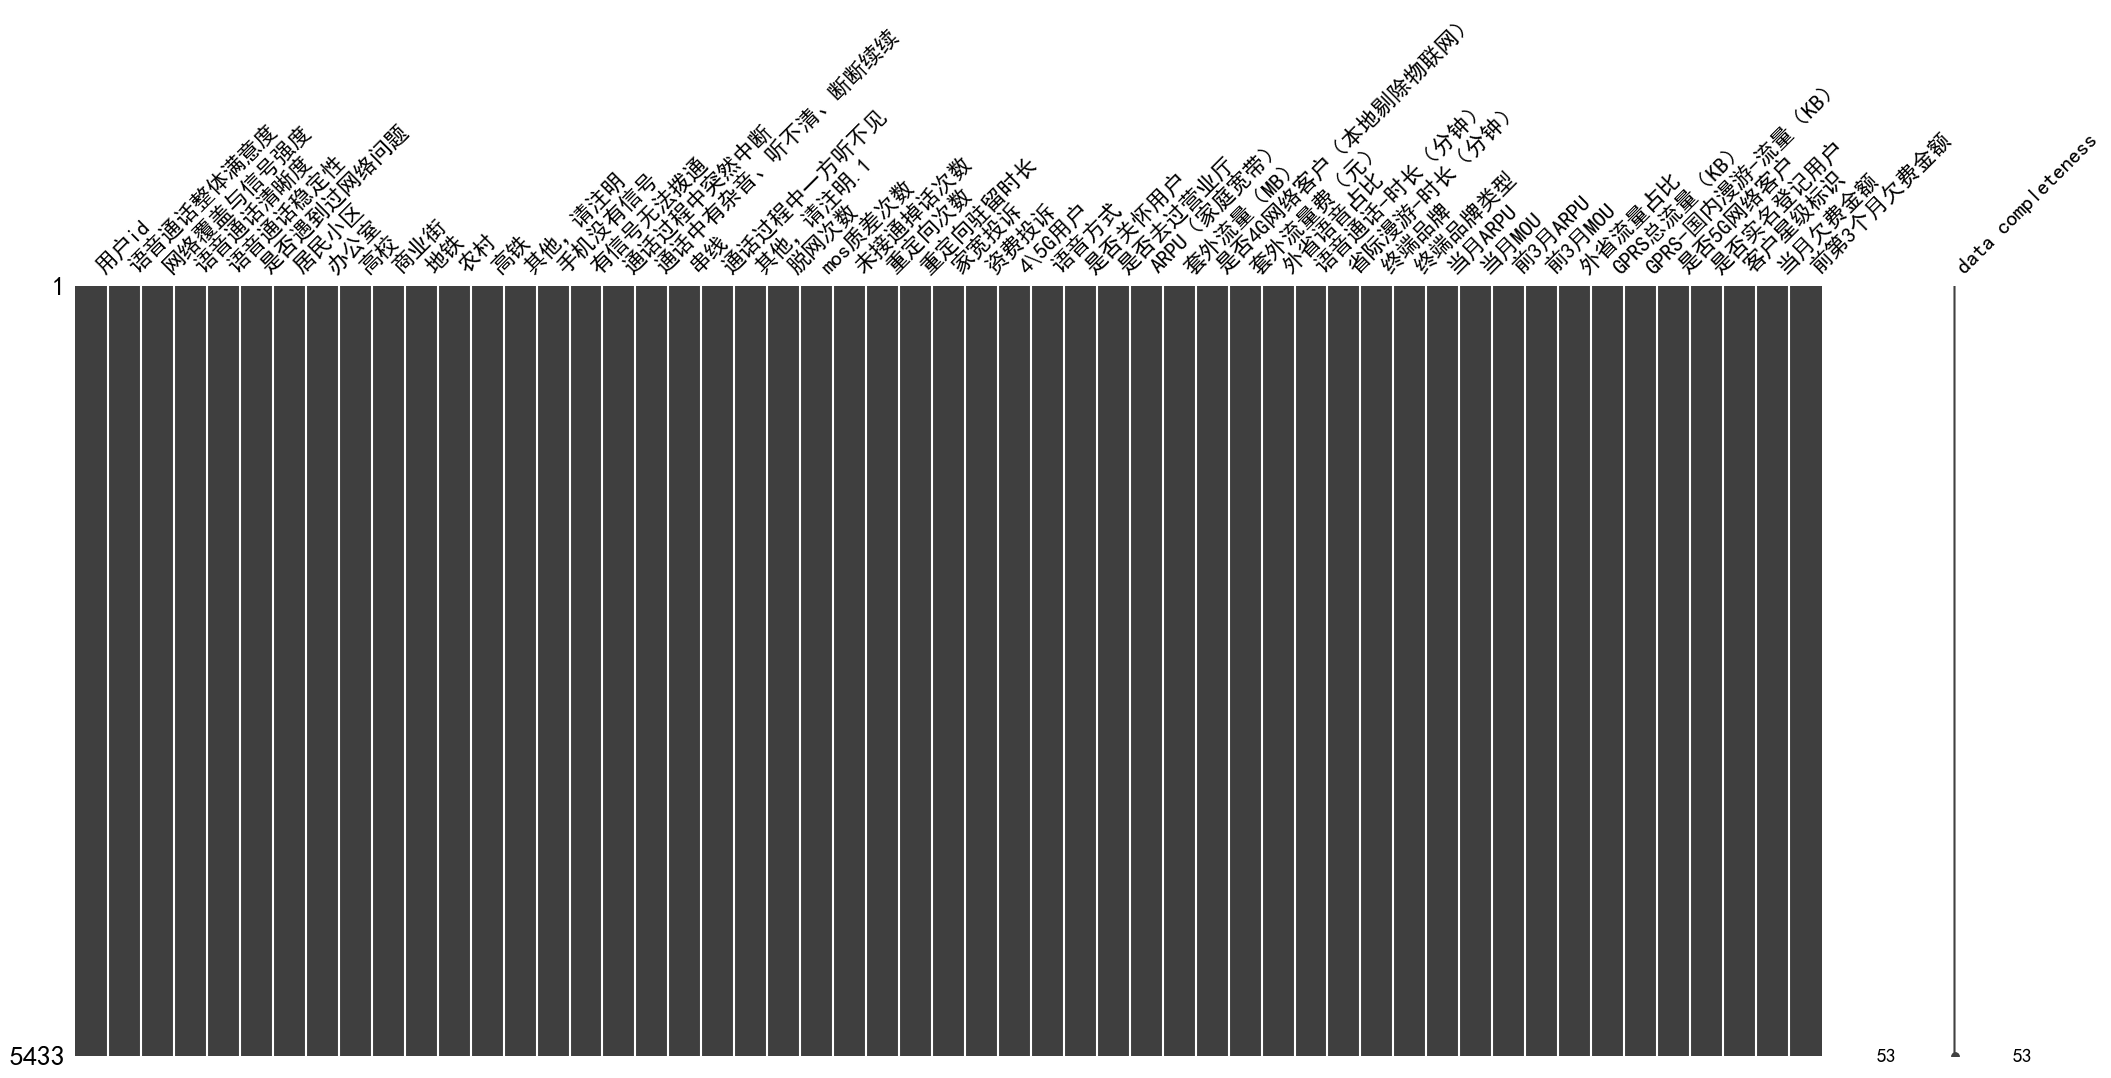

In [6]:
# 缺失值可视化 - 补充缺失值后
msno.matrix(data1, labels=True)

In [7]:
data1.columns[data1.isnull().sum() > 0] # 至此，数据已经没有有缺失的列了

Index([], dtype='object')

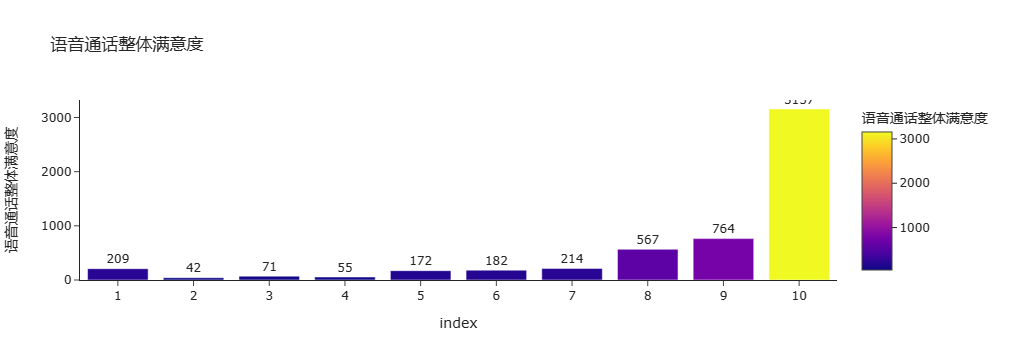

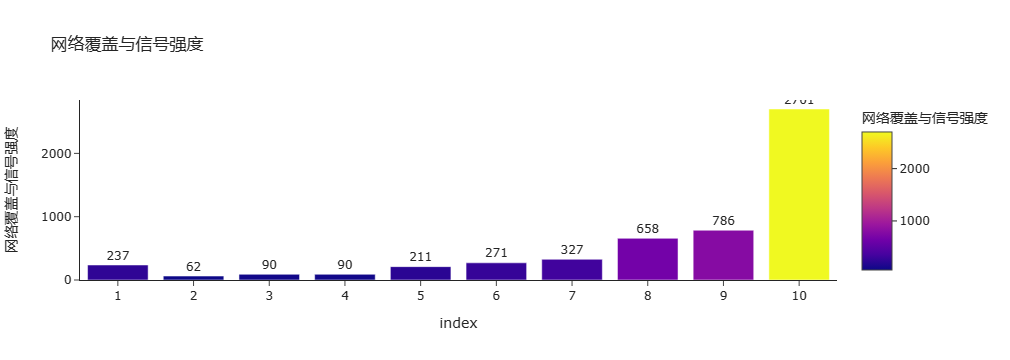

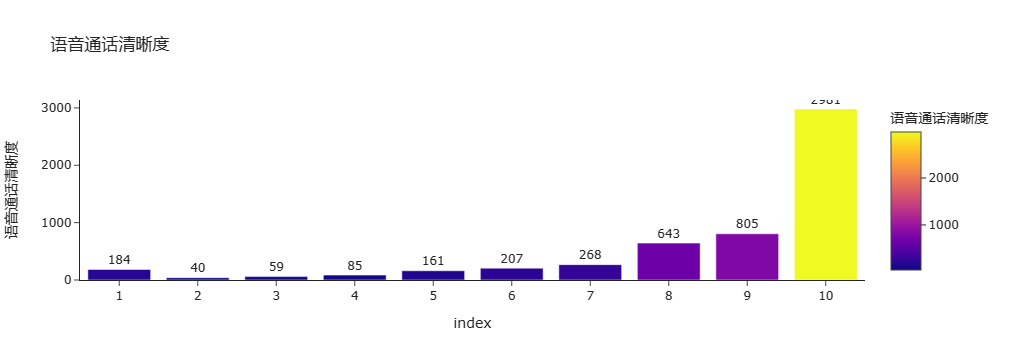

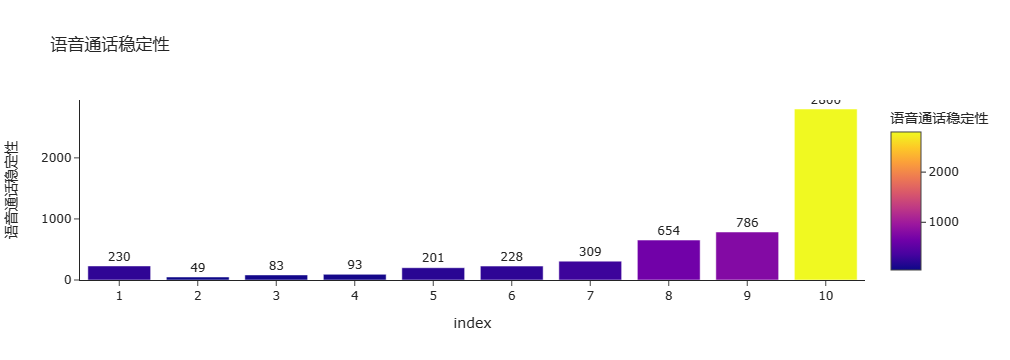

In [57]:
# 通话整体满意度的分布
list1 = ["语音通话整体满意度","网络覆盖与信号强度","语音通话清晰度","语音通话稳定性"]

import plotly.io as pio
pio.renderers.default='notebook'
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

for i in list1:
    call_satisfaction = pd.DataFrame(data1[i].value_counts()).sort_index()
    import plotly.express as px
    fig = px.bar(call_satisfaction,
                 call_satisfaction.index, 
                 i, #
                 color=i,#
                 title=i,#
                 text= i)#
    fig.update_xaxes(type='category')
    fig.update_traces(textposition='outside')
    fig.update_layout(template = "simple_white")
    fig.show()

In [9]:
#前四项高度相关
data1.iloc[:,1:5].corr().style.background_gradient(cmap='Blues')

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性
语音通话整体满意度,1.000000,0.895252,0.908378,0.885881
网络覆盖与信号强度,0.895252,1.000000,0.896669,0.894704
语音通话清晰度,0.908378,0.896669,1.000000,0.901854
语音通话稳定性,0.885881,0.894704,0.901854,1.000000


# 2.特征工程

## 2.1 类别特征处理

### 2.1.1 是、否类似的特征用0、1进行标签编码

In [10]:
# 处理是否遇到网络问题 1为遇到过 2为没有遇到过
data1["是否遇到过网络问题"] = data1["是否遇到过网络问题"].map({2:0, 1:1})

In [11]:
# 处理7个用户所在场景列 在该场景下记为1 不在记为0
# 居民小区 办公室 高校 商业街 地铁 农村 高铁
data1["居民小区"] = data1["居民小区"].map({-1:0, 1:1})
data1["办公室"] = data1["办公室"].map({-1:0, 2:1})
data1["高校"] = data1["高校"].map({-1:0, 3:1})
data1["商业街"] = data1["商业街"].map({-1:0, 4:1})
data1["地铁"] = data1["地铁"].map({-1:0, 5:1})
data1["农村"] = data1["农村"].map({-1:0, 6:1})
data1["高铁"] = data1["高铁"].map({-1:0, 7:1})

In [12]:
# 处理6个用户通话过程中的网络问题
data1["手机没有信号"] = data1["手机没有信号"].map({-1:0, 1:1})
data1["有信号无法拨通"] = data1["有信号无法拨通"].map({-1:0, 2:1})
data1["通话过程中突然中断"] = data1["通话过程中突然中断"].map({-1:0, 3:1})
data1["通话中有杂音、听不清、断断续续"] = data1["通话中有杂音、听不清、断断续续"].map({-1:0, 4:1})
data1["串线"] = data1["串线"].map({-1:0, 5:1})
data1["通话过程中一方听不见"] = data1["通话过程中一方听不见"].map({-1:0, 6:1})

In [13]:
# 处理两个其他，请注明
data1['其他，请注明.1'] = data1["其他，请注明.1"].map({-1:0, 98:1})
data1['其他，请注明'] = data1["其他，请注明"].map({-1:0, 98:1})

In [14]:
# 是否关怀用户 是否去过营业厅 是否4G网络客户（本地剔除物联网）是否5G网络客户 是否实名登记用户
data1['是否关怀用户'] = data1["是否关怀用户"].map({'否':0, '是':1})
data1['是否去过营业厅'] = data1["是否去过营业厅"].map({'否':0, '是':1})
data1['是否4G网络客户（本地剔除物联网）'] = data1["是否4G网络客户（本地剔除物联网）"].map({'否':0, '是':1})
data1['是否5G网络客户'] = data1["是否5G网络客户"].map({'否':0, '是':1})
data1['是否实名登记用户'] = data1["是否实名登记用户"].map({'否':0, '是':1})

### 2.1.2 高类别数特征编码  频数编码

In [15]:
# 一共五个多类别特征 序列编码
# 网络制式 r'4\5G用户' 2G 4G 5G
data1[r'4\5G用户'] = data1[r'4\5G用户'].map({'2G':2, '4G':4, '5G':5})

# 语音方式 6种 频数编码
data1['语音方式'] = data1['语音方式'].map(data1['语音方式'].value_counts())

# 终端品牌 多类别 频数编码
data1['终端品牌'] = data1['终端品牌'].map(data1['终端品牌'].value_counts())

# 终端品牌类型 多类别 频数编码
data1['终端品牌类型'] = data1['终端品牌类型'].map(data1['终端品牌类型'].value_counts())

# 客户星级标识 可能采取标签编码：未评级，准星， 一星，二星，三星，银卡，金卡，白金卡，钻石卡 1-9映射
data1['客户星级标识'] = data1["客户星级标识"].map({'未评级':1, '准星':2, '一星':3,'二星':4, '三星':5, '银卡':6,'金卡':7, '白金卡':8, '钻石卡':9})

In [16]:
data1.dtypes.value_counts() # 全部特征已经变为整型和浮点型

int64      42
float64    11
dtype: int64

## 2.2 特征选择

<AxesSubplot:>

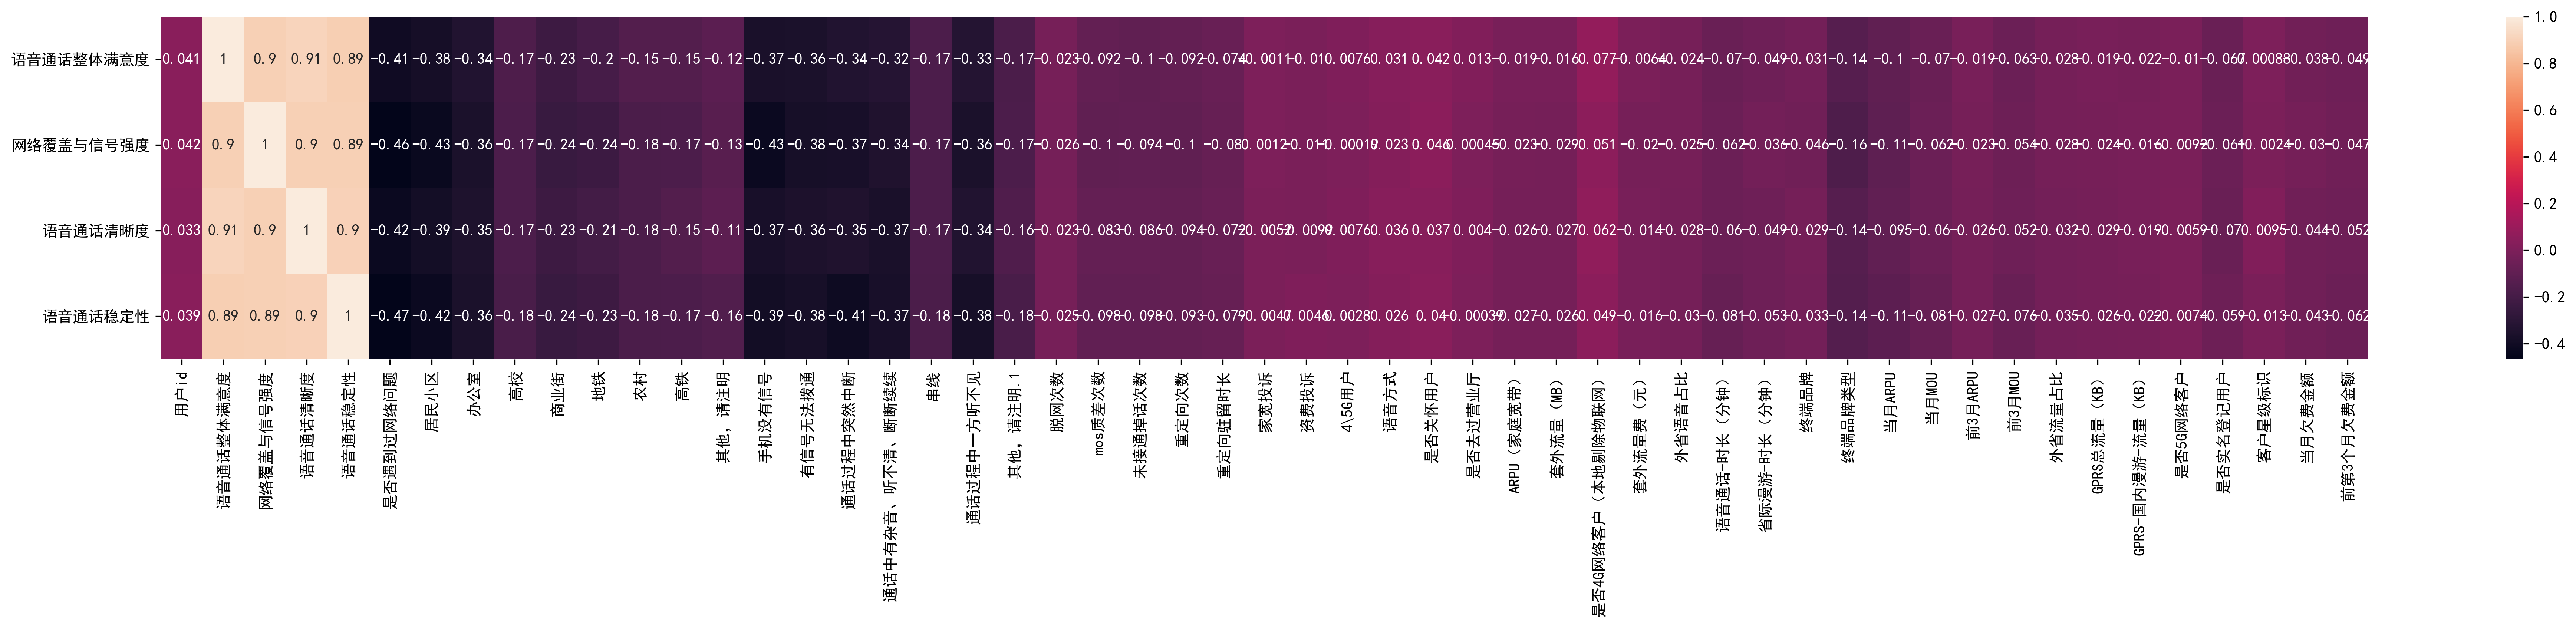

In [17]:
import seaborn as sns # 导seaborn包
plt.rcParams['font.sans-serif']=['SimHei'] # 设置图片正确显示中文
plt.rcParams['axes.unicode_minus'] = False # 设置图片正确显示负数
plt.figure(figsize=(32,4),dpi=300) #设置图片大小和分辨率
sns.heatmap(data1.corr()[1:5], annot=True) # 绘图

In [18]:
# 分离数据
X = data1.iloc[:,5:] # 当前特征
Y1 = data1.iloc[:,1] # 语音通话整体满意度
Y2 = data1.iloc[:,2] # 网络覆盖与信号强度
Y3 = data1.iloc[:,3] # 语音通话清晰度
Y4 = data1.iloc[:,4] # 语音通话稳定性

In [19]:
# 使用imlbearn库中上采样方法中的SMOTE接口 ########### 改这里 Y1 Y2 Y3 Y4
from imblearn.over_sampling import SMOTE
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X, Y4 = smo.fit_resample(X, Y4)
#查看经过SMOTE之后的数据分布
Y4.value_counts()

6     2800
1     2800
7     2800
3     2800
4     2800
9     2800
10    2800
8     2800
5     2800
2     2800
Name: 语音通话稳定性, dtype: int64

### 2.2.1 方差过滤

In [20]:
# 特征选择第0步： 由于题目问题，有部分特征训练集有测试集没有 需要找出来，删掉
data3 = pd.read_excel(r"F:\2022B\附件3语音业务用户满意度预测数据.xlsx")
X_columns = list(X.columns)
data3_columns = list(data3.columns)
data_diff_list = list(set(X_columns).difference(data3_columns))
X = X.drop(data_diff_list, axis = 1)

* 常量值特征：分子变量值只有１个值，筛选根据：方差为0。
* 准常量特征：90％分子变量取值都相同，筛选根据：方差不大于0.1。
* 其余情况视为一般特征。
因为常量特征和准常量特征提供的有价值信息非常少，故将这些特征剔除。暂时保留一般特征用于进一步筛选。

In [21]:
# 特征选择第一步：过滤常量和准常量特征
from sklearn.feature_selection import SelectFromModel,VarianceThreshold
# 设置方差阈值为0，过滤常量特征
sel_constant = VarianceThreshold(threshold = 0.1)  # 选择方差＞0的特征，过滤掉方差<0.1的特征
sel_constant.fit(X)  # 计算方差，【注意】调用fit或fit_transform计算时df_data_copy会转换为ndarray类型
# 查询过滤的常量特征的数量
num_left_feature = sum(sel_constant.get_support())  # 方差＞0的特征，即剩余特征数
num_constant_feature = X.shape[1] - num_left_feature # 常量特征数 无常量特征
print('常量特征（需要剔除的）数量:', num_constant_feature)  # 常量特征数：
print('剩余特征数量:',num_left_feature)  # 剩余特征数：505
constant_colName_list = [ x for x in X.columns if x not in X.columns[sel_constant.get_support()] ]
print(constant_colName_list)

常量特征（需要剔除的）数量: 11
剩余特征数量: 27
['高校', '商业街', '农村', '高铁', '其他，请注明', '串线', '其他，请注明.1', '是否关怀用户', '是否4G网络客户（本地剔除物联网）', '外省语音占比', '外省流量占比']


In [22]:
X = X.drop(constant_colName_list, axis = 1)

### 2.2.2 相关性系数过滤

In [23]:
# 特征选择第二步：去掉相关性强的冗余特征
def correlation(data, threshold, method = "pearson"):
    
    # 定义一个集合放置高度相关的变量的名称，利用集合元素不重复的特性
    col_corr = set()
    
    # 使用相关性系数，默认皮尔逊相关
    corr_matrix = data.corr(method = method)
    
    # 已将变量按重要性降序排序，逐行逐元素判断相关性系数是否大于阈值，如果大于则将重要性较小的变量名称放入集合中
    # corr_matrix.columns[i]对于重要程度小的变量名称
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# 分别调用correlation函数求出相关性超过阈值0.9的变量
high_pearson_list = list(correlation(X, 0.90, method = "pearson"))
high_spearman_list = list(correlation(X, 0.90, method = "spearman"))
high_corr_list = list(set(high_pearson_list + high_spearman_list))

print(high_corr_list)

['当月MOU', '是否5G网络客户']


In [24]:
X = X.drop(high_corr_list, axis = 1)

### 2.2.3 随机森林特征重要性筛选

done in 6.294s
(25,)


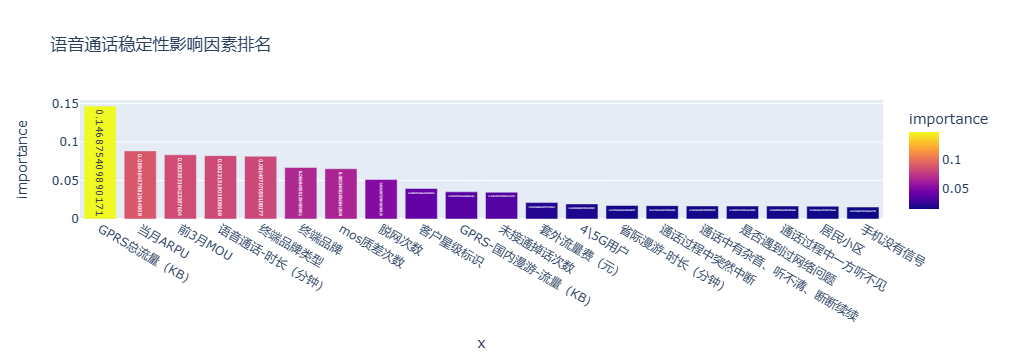

In [25]:
# 特征选择重要性：随机森林模型 评估特重要性
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# 输入数据准备
X = X
Y = Y4 #语音通话整体满意度  改动这里就好了！！！！！！！！！！！！！！！！！！！！！！！ Y1 Y2 Y3 Y4

# 记录起始时间
t0 = time()

# 模型构建
forest = RandomForestClassifier(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = forest.fit(X_train, y_train)

# 统计模型建立时间
print("done in %0.3fs"%(time() - t0))

# 输出特征重要性
importances = forest.feature_importances_
print(importances.shape)

# 特征重要性成dataframe并排序
feature_importance = pd.DataFrame(list(importances),columns = ["importance"],index = X.columns)
feature_importance_sorted = feature_importance.sort_values(by = "importance", ascending = False)

#特征重要性柱状图 - plotly
import plotly.express as px
#绘制条形图
fig = px.bar(feature_importance_sorted[:20],# 前20重要特征
            x = feature_importance_sorted[:20].index, 
            y = "importance",
            color="importance",
            text = "importance",
            title = "语音通话稳定性影响因素排名")
fig.show()

In [26]:
feature_importance_sorted

,importance
GPRS总流量（KB）,0.146875
当月ARPU,0.088485
前3月MOU,0.083383
语音通话-时长（分钟）,0.082315
终端品牌类型,0.081497
终端品牌,0.066941
mos质差次数,0.065348
脱网次数,0.051307
客户星级标识,0.039637
GPRS-国内漫游-流量（KB）,0.035273


# 3.模型预测

## 3.0 预定义函数

In [27]:
retain_list = list(feature_importance_sorted[:20].index)
X1 = X.loc[:,retain_list] # 将剩下的数据保存为X1

In [28]:
# 绘图
def showpic(modeltype = ""):
    """
    绘制集验证数据的真实值和预测值的对比图
    
    参数:
        modeltype:表示模型类型的字符串
        
    返回值：
        输出图片
    """
    # 定义绘图样式和图片大小
    import matplotlib.pyplot as plt
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize = (20,10))
    
    # 构建 dataframe 
    y_pred_df = pd.DataFrame(y_pred,columns = ['predict'])
    y_true_df =pd.DataFrame(list(y_test),columns = ['true'])
    
    #真实值折线
    ax.plot(y_pred_df.index[-50:], y_pred_df['predict'][-50:], marker = "o", color = "r",label = 'predict')
    
    #预测值折线
    ax.plot(y_true_df.index[-50:], y_true_df['true'][-50:], marker = "o", color = "b",label = 'true') 
    
    # 增加图例、标题、轴标题等
    ax.legend()
    ax.set_title("Prediction Result of " + modeltype)
    ax.set_ylabel("分值")
    ax.set_xlabel("Index of test data")
    
    # 绘图
    plt.show()

In [29]:
import matplotlib.pyplot as pl
from sklearn import metrics
import numpy as np
# 相关库

def plot_matrix(y_true, y_pred, labels_name, title=None, thresh=0.8, axis_labels=None):
# 利用sklearn中的函数生成混淆矩阵并归一化
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels_name, sample_weight=None)  # 生成混淆矩阵 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 归一化

# 画图，如果希望改变颜色风格，可以改变此部分的cmap=pl.get_cmap('Blues')处
    pl.imshow(cm, cmap=pl.get_cmap('Blues'))
    pl.colorbar()  # 绘制图例

# 图像标题
    if title is not None:
        pl.title(title)
# 绘制坐标
    num_local = np.array(range(len(labels_name)))
    if axis_labels is None:
        axis_labels = labels_name
    pl.xticks(num_local, axis_labels, rotation=45)  # 将标签印在x轴坐标上， 并倾斜45度
    pl.yticks(num_local, axis_labels)  # 将标签印在y轴坐标上
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

# 将百分比打印在相应的格子内，大于thresh的用白字，小于的用黑字
    for i in range(np.shape(cm)[0]):
        for j in range(np.shape(cm)[1]):
            if int(cm[i][j] * 100 + 0.5) > 0:
                pl.text(j, i, format(int(cm[i][j] * 100 + 0.5), 'd') + '%',
                        ha="center", va="center",
                        color="white" if cm[i][j] > thresh else "black")  # 如果要更改颜色风格，需要同时更改此行
#显示
    plt.show()

## 3.1 决策树模型

In [30]:
# 决策树分类
X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.30)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train.ravel())

y_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

# 模型评价指标展示
from sklearn.metrics import classification_report
t = classification_report(y_test, y_pred, target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"],output_dict = True)
t_metrics = pd.DataFrame(t)
t_metrics

,1分,2分,3分,4分,5分,6分,7分,8分,9分,10分,accuracy,macro avg,weighted avg
precision,0.774566,0.921720,0.893018,0.849348,0.759770,0.733004,0.662085,0.493064,0.501253,0.510610,0.717024,0.709844,0.711686
recall,0.800478,0.957617,0.894025,0.890547,0.800242,0.710180,0.682409,0.489362,0.460829,0.467233,0.717024,0.715292,0.717024
f1-score,0.787309,0.939326,0.893521,0.869460,0.779481,0.721411,0.672093,0.491206,0.480192,0.487959,0.717024,0.712196,0.713983
support,837.000000,873.000000,887.000000,804.000000,826.000000,835.000000,847.000000,799.000000,868.000000,824.000000,0.717024,8400.000000,8400.000000


In [31]:
dt_df = pd.DataFrame({"precision":[t_metrics.loc["precision","macro avg"]],
              "recall":[t_metrics.loc['recall',"macro avg"]],
              "f1_score":[t_metrics.loc['f1-score',"macro avg"]],
              "accuracy":[t_metrics.loc['precision',"accuracy"]],
              "model":"Decision Tree"})
dt_df

,precision,recall,f1_score,accuracy,model
0,0.709844,0.715292,0.712196,0.717024,Decision Tree


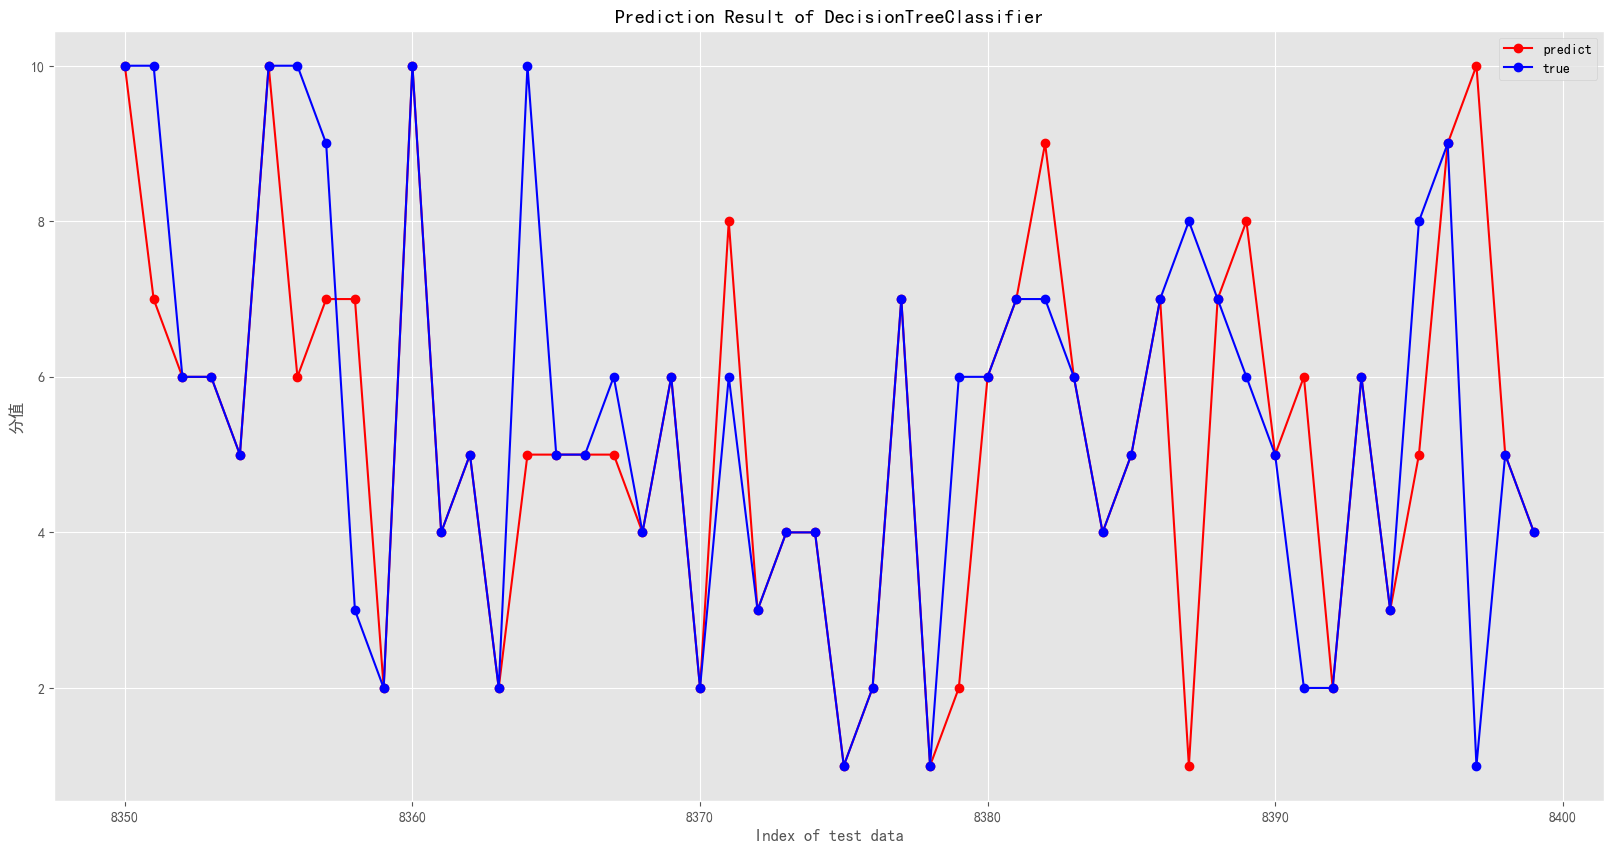

In [32]:
# 模型拟合效果绘图
showpic("DecisionTreeClassifier")

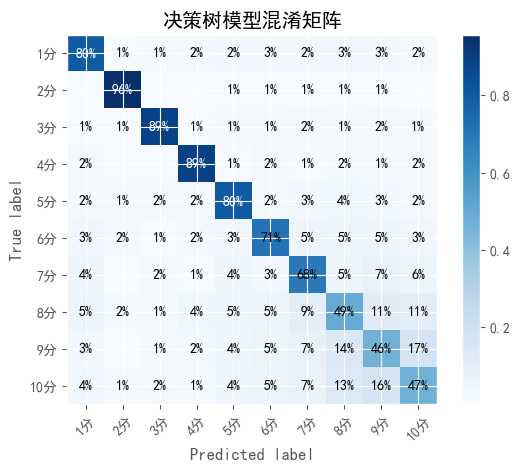

In [33]:
target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"]
plot_matrix(y_test, y_pred,[1,2,3,4,5,6,7,8,9,10], title='决策树模型混淆矩阵',
            axis_labels=target_names)

## 3.2 随机森林模型

In [34]:
# 随机森林分类器
X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(X_train, y_train.ravel())

y_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

# 模型评价指标展示
from sklearn.metrics import classification_report
t = classification_report(y_test, y_pred, target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"],output_dict = True)
t_metrics = pd.DataFrame(t)
t_metrics

,1分,2分,3分,4分,5分,6分,7分,8分,9分,10分,accuracy,macro avg,weighted avg
precision,0.871737,0.955257,0.931634,0.927684,0.887601,0.841703,0.821472,0.762759,0.682192,0.721130,0.845595,0.840317,0.839167
recall,0.919760,0.998830,0.991369,0.984412,0.922892,0.917857,0.850187,0.637832,0.581776,0.673938,0.845595,0.847885,0.845595
f1-score,0.895105,0.976558,0.960573,0.955207,0.904903,0.878132,0.835583,0.694724,0.627995,0.696736,0.845595,0.842551,0.840808
support,835.000000,855.000000,811.000000,834.000000,830.000000,840.000000,801.000000,867.000000,856.000000,871.000000,0.845595,8400.000000,8400.000000


In [35]:
rf_df = pd.DataFrame({"precision":[t_metrics.loc["precision","macro avg"]],
              "recall":[t_metrics.loc['recall',"macro avg"]],
              "f1_score":[t_metrics.loc['f1-score',"macro avg"]],
              "accuracy":[t_metrics.loc['precision',"accuracy"]],
              "model":"Random Forest"})
rf_df

,precision,recall,f1_score,accuracy,model
0,0.840317,0.847885,0.842551,0.845595,Random Forest


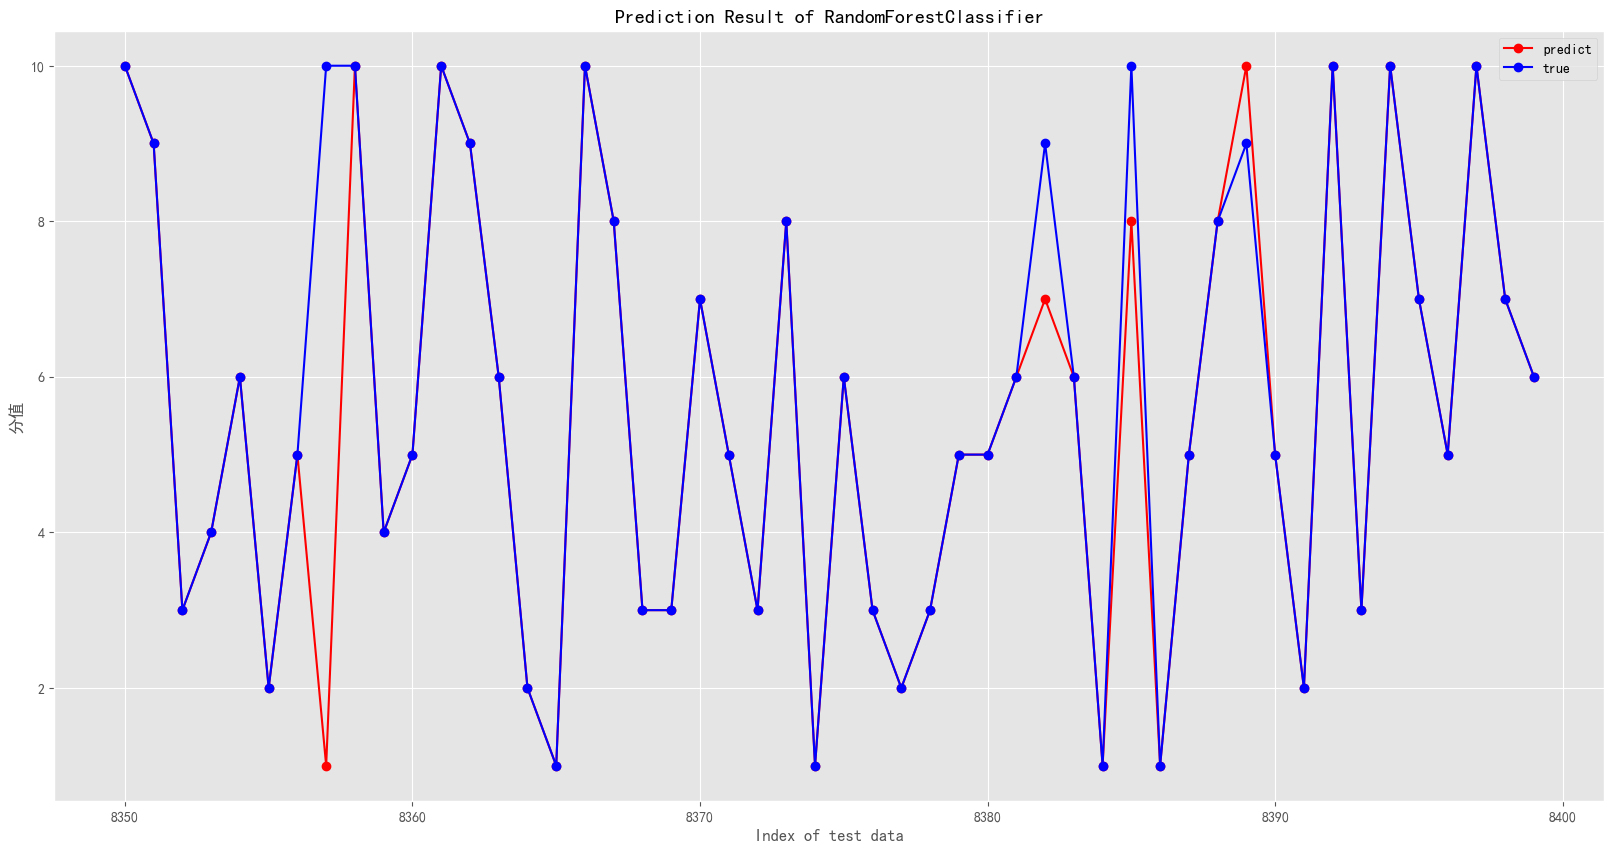

In [36]:
# 模型拟合效果绘图
showpic("RandomForestClassifier")

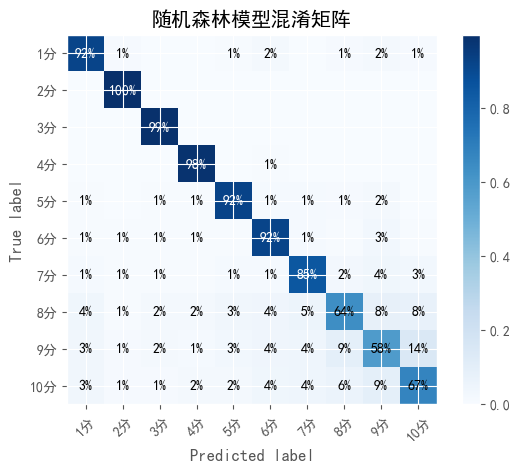

In [37]:
target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"]
plot_matrix(y_test, y_pred,[1,2,3,4,5,6,7,8,9,10], title='随机森林模型混淆矩阵',
            axis_labels=target_names)

## 3.3 XGBoost模型

In [38]:
# XGBOOST
X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.20)

import xgboost as xgb
xgb = xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

model = xgb.fit(X_train,y_train.ravel())

y_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

# 模型评价指标展示
from sklearn.metrics import classification_report
t = classification_report(y_test, y_pred, target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"],output_dict = True)
t_metrics = pd.DataFrame(t)
t_metrics

,1分,2分,3分,4分,5分,6分,7分,8分,9分,10分,accuracy,macro avg,weighted avg
precision,0.910035,0.966667,0.939236,0.932458,0.900506,0.898714,0.836299,0.750000,0.707889,0.666667,0.853929,0.850847,0.851469
recall,0.914783,0.992793,0.978300,0.978346,0.948490,0.904531,0.811744,0.645503,0.617100,0.746324,0.853929,0.853791,0.853929
f1-score,0.912402,0.979556,0.958370,0.954851,0.923875,0.901613,0.823839,0.693839,0.659384,0.704250,0.853929,0.851198,0.851596
support,575.000000,555.000000,553.000000,508.000000,563.000000,618.000000,579.000000,567.000000,538.000000,544.000000,0.853929,5600.000000,5600.000000


In [39]:
xgb_df = pd.DataFrame({"precision":[t_metrics.loc["precision","macro avg"]],
              "recall":[t_metrics.loc['recall',"macro avg"]],
              "f1_score":[t_metrics.loc['f1-score',"macro avg"]],
              "accuracy":[t_metrics.loc['precision',"accuracy"]],
              "model":"XGBoost"})
xgb_df

,precision,recall,f1_score,accuracy,model
0,0.850847,0.853791,0.851198,0.853929,XGBoost


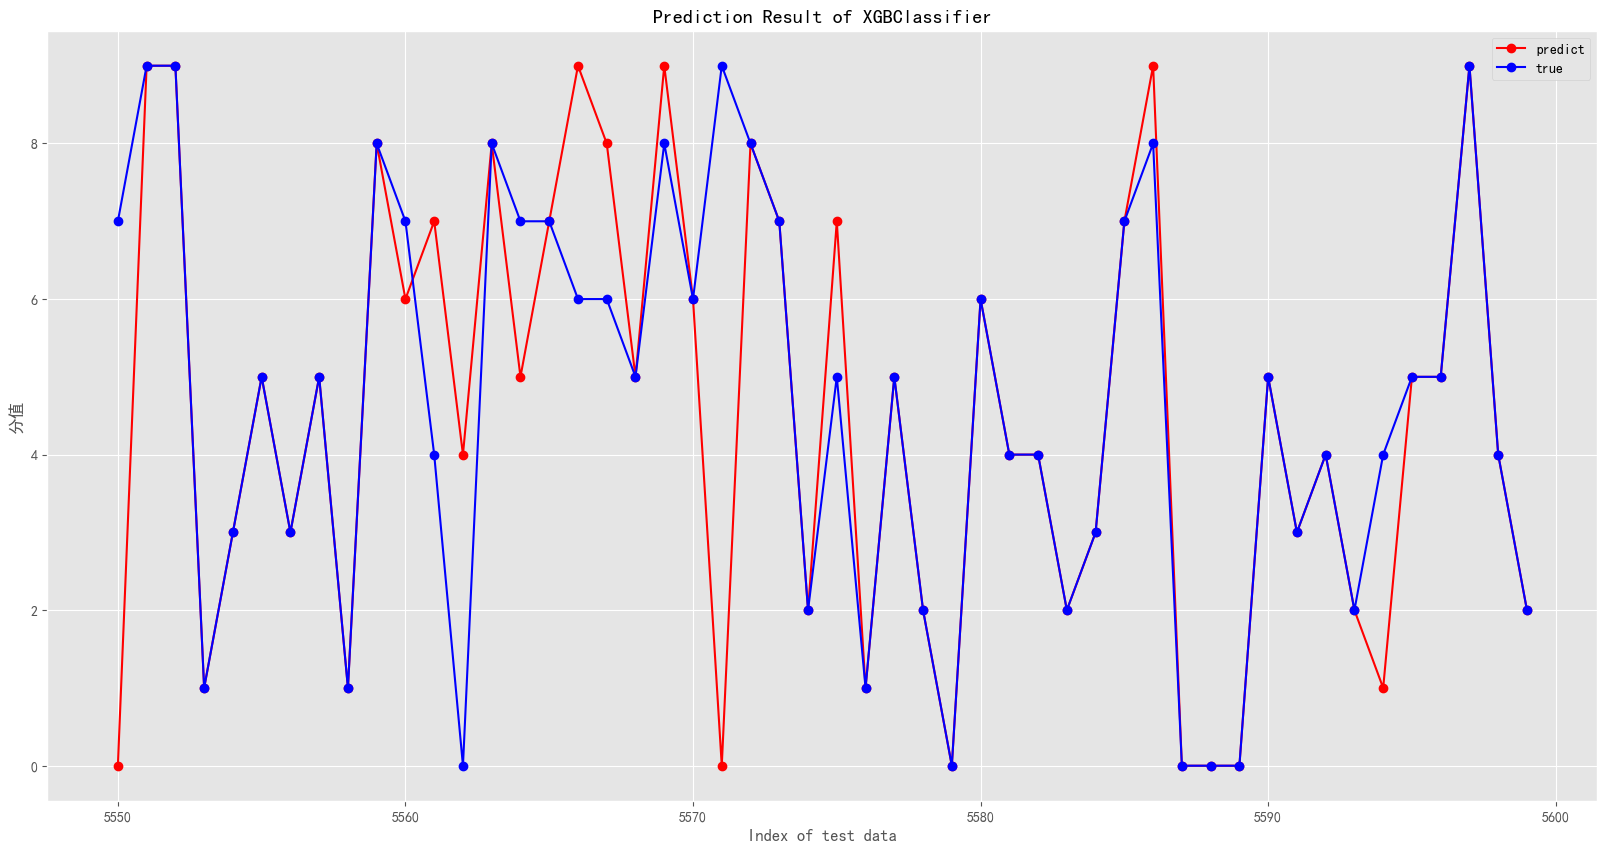

In [40]:
# 模型拟合效果绘图
showpic("XGBClassifier")

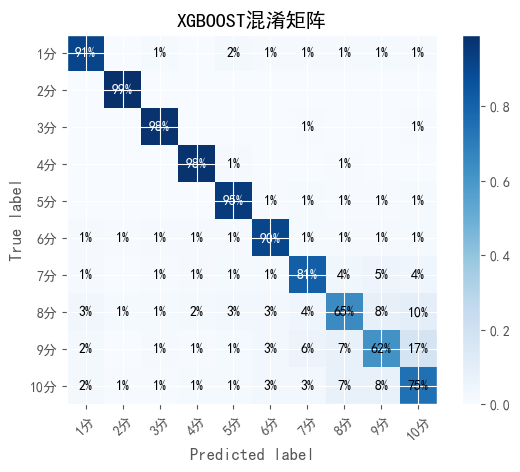

In [41]:
target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"]
plot_matrix(y_test, y_pred,[0,1,2,3,4,5,6,7,8,9], title='XGBOOST混淆矩阵',
            axis_labels=target_names)

## 3.4 lighGBM模型

In [42]:
# lighGBM
X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.20)
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
model = clf.fit(X_train, y_train.ravel())

y_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

# 模型评价指标展示
from sklearn.metrics import classification_report
t = classification_report(y_test, y_pred, target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"],output_dict = True)
t_metrics = pd.DataFrame(t)
t_metrics

,1分,2分,3分,4分,5分,6分,7分,8分,9分,10分,accuracy,macro avg,weighted avg
precision,0.884211,0.966555,0.937500,0.927586,0.872093,0.831190,0.819639,0.739514,0.701357,0.658055,0.837321,0.833770,0.834258
recall,0.911392,0.994836,0.972973,0.974638,0.913043,0.889845,0.798828,0.564924,0.562613,0.791590,0.837321,0.837468,0.837321
f1-score,0.897596,0.980492,0.954907,0.950530,0.892099,0.859518,0.809100,0.640535,0.624371,0.718672,0.837321,0.832782,0.832907
support,553.000000,581.000000,555.000000,552.000000,575.000000,581.000000,512.000000,593.000000,551.000000,547.000000,0.837321,5600.000000,5600.000000


In [43]:
lgb_df = pd.DataFrame({"precision":[t_metrics.loc["precision","macro avg"]],
              "recall":[t_metrics.loc['recall',"macro avg"]],
              "f1_score":[t_metrics.loc['f1-score',"macro avg"]],
              "accuracy":[t_metrics.loc['precision',"accuracy"]],
              "model":"LightGBM"})
lgb_df

,precision,recall,f1_score,accuracy,model
0,0.83377,0.837468,0.832782,0.837321,LightGBM


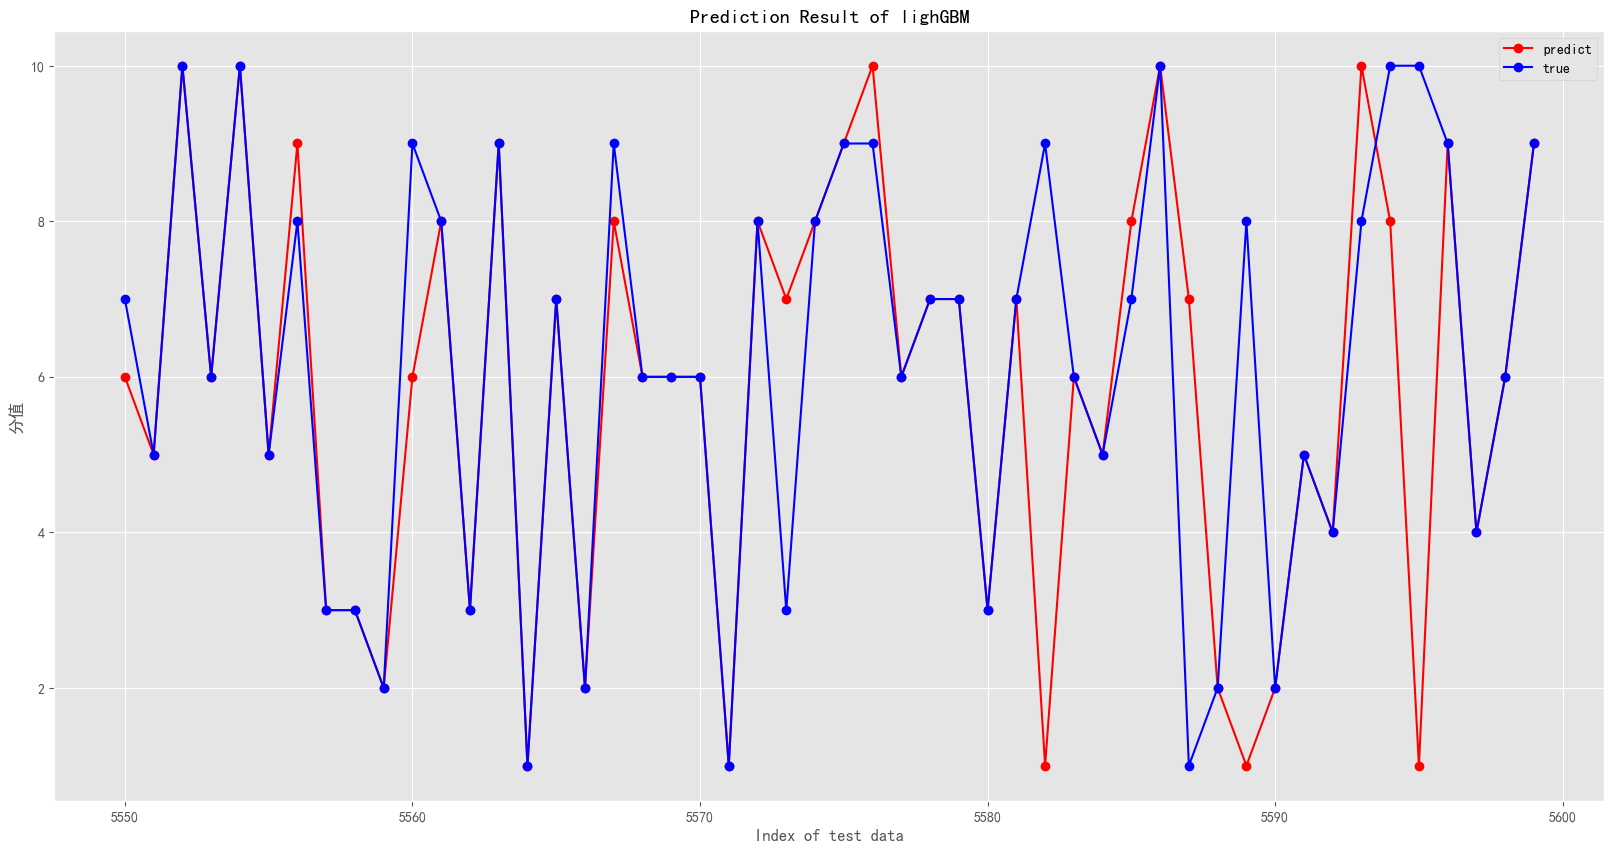

In [44]:
# 模型拟合效果绘图
showpic("lighGBM")

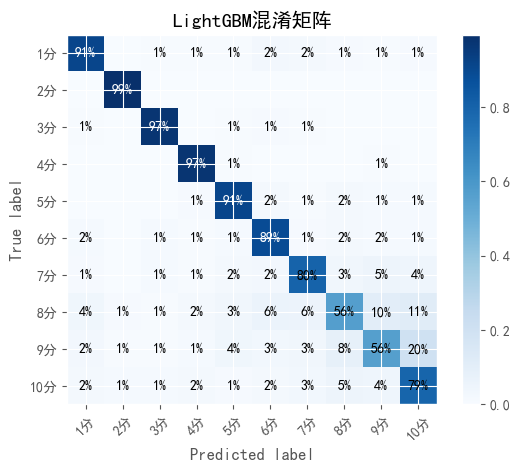

In [45]:
target_names=["1分","2分","3分","4分","5分","6分","7分","8分","9分","10分"]
plot_matrix(y_test, y_pred,[1,2,3,4,5,6,7,8,9,10], title='LightGBM混淆矩阵',
            axis_labels=target_names)

In [46]:
evaluation = pd.concat([dt_df,rf_df,xgb_df,lgb_df]).reset_index(drop = True)
evaluation.style.background_gradient(cmap='Blues')

,precision,recall,f1_score,accuracy,model
0,0.709844,0.715292,0.712196,0.717024,Decision Tree
1,0.840317,0.847885,0.842551,0.845595,Random Forest
2,0.850847,0.853791,0.851198,0.853929,XGBoost
3,0.833770,0.837468,0.832782,0.837321,LightGBM


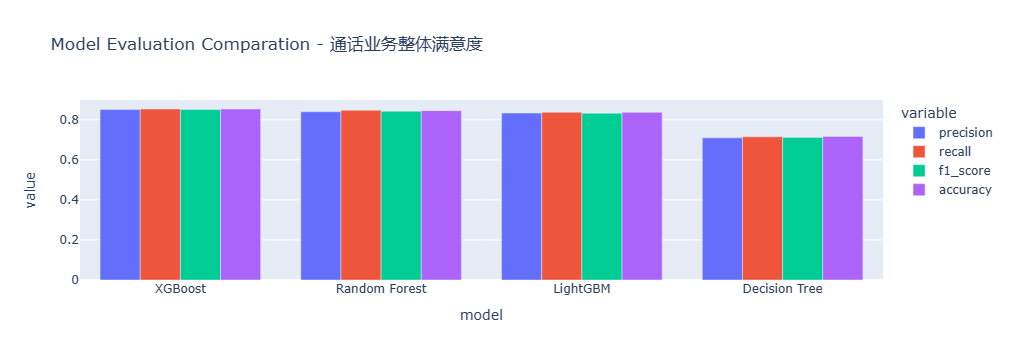

In [47]:
# plotly 绘制柱状图
import plotly.express as px
fig = px.bar(
    evaluation.sort_values('accuracy', ascending = False), #数据集
    x = 'model',
    y = ['precision','recall','f1_score','accuracy'],
    barmode = "group",
    title = "Model Evaluation Comparation - 通话业务整体满意度"
    )
fig.show()

经过以上训练，对于语音业务，XGBoost模型预测accuracy能达到85%左右，XGboost > lightGBM > RF > DT, XGBoost为最佳模型

# 5.结果预测

## 5.1 测试及数据处理

In [48]:
list(feature_importance_sorted.index)

['GPRS总流量（KB）',
 '当月ARPU',
 '前3月MOU',
 '语音通话-时长（分钟）',
 '终端品牌类型',
 '终端品牌',
 'mos质差次数',
 '脱网次数',
 '客户星级标识',
 'GPRS-国内漫游-流量（KB）',
 '未接通掉话次数',
 '套外流量费（元）',
 '4\\5G用户',
 '省际漫游-时长（分钟）',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '是否遇到过网络问题',
 '通话过程中一方听不见',
 '居民小区',
 '手机没有信号',
 '办公室',
 '地铁',
 '套外流量（MB）',
 '有信号无法拨通',
 '前3月ARPU']

In [49]:
data3 = pd.read_excel(r"F:\2022B\附件3语音业务用户满意度预测数据.xlsx")
data_use = data3.loc[:,list(feature_importance_sorted.index)]
data_use

,GPRS总流量（KB）,当月ARPU,前3月MOU,语音通话-时长（分钟）,终端品牌类型,终端品牌,mos质差次数,脱网次数,客户星级标识,GPRS-国内漫游-流量（KB）,...,通话中有杂音、听不清、断断续续,是否遇到过网络问题,通话过程中一方听不见,居民小区,手机没有信号,办公室,地铁,套外流量（MB）,有信号无法拨通,前3月ARPU
0,14360274,45.37,139,161,BLA-AL00,华为,0,1,一星,0,...,-1,2,-1,-1,-1,-1,-1,9.55,-1,23.6
1,9585266,60.00,102,270,LYA-AL00,华为,17,0,三星,0,...,4,1,-1,1,-1,2,-1,0.00,-1,60.0
2,6545659,89.00,80,662,A2412,苹果,39,13,三星,0,...,-1,2,-1,-1,-1,-1,-1,0.00,-1,89.0
3,8266166,70.00,333,645,A2104,苹果,13,8,三星,0,...,-1,1,-1,1,-1,-1,-1,0.00,-1,69.1
4,13254086,56.00,258,496,NOH-AN00,华为,1,22,三星,0,...,-1,1,6,1,-1,-1,-1,0.00,2,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,34089161,47.00,42,110,EML-AL00,华为,1,109,三星,0,...,-1,1,-1,-1,1,-1,-1,0.00,-1,197.0
2595,4355664,57.00,157,238,iPhone 6S PLUS A1699,苹果,9,16,三星,0,...,-1,2,-1,-1,-1,-1,-1,0.00,-1,77.0
2596,27678375,8.10,194,202,A2785,苹果,2,3,三星,0,...,-1,2,-1,-1,-1,-1,-1,0.00,-1,8.0
2597,5410723,58.20,66,148,JSN-AL00a,华为,3,10,三星,334996,...,-1,1,6,-1,-1,-1,-1,0.00,-1,58.3


<AxesSubplot:>

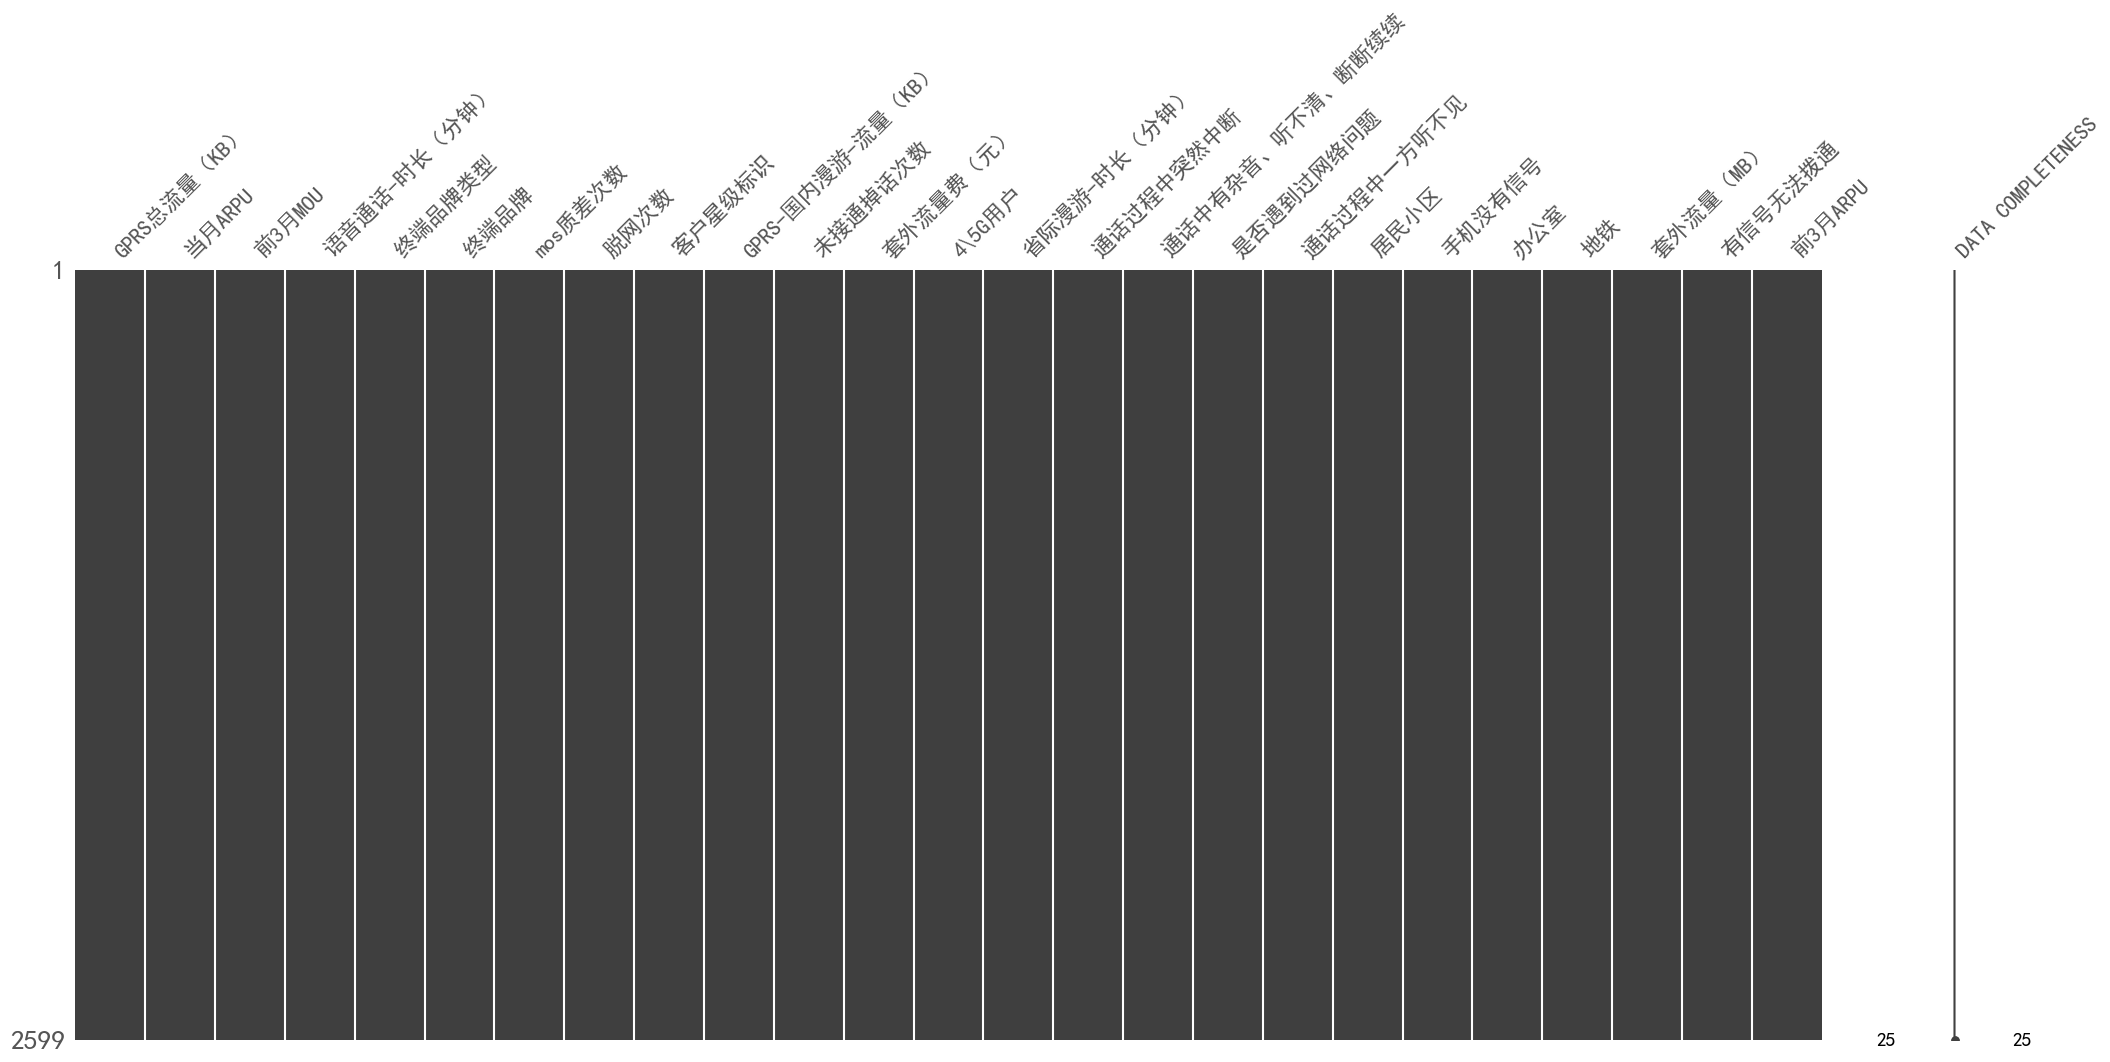

In [50]:
# 缺失值可视化
msno.matrix(data_use, labels=True) # 没有缺失值

In [51]:
# 需要处理的列
# 终端产品类型
data_use['终端品牌类型'] = data_use['终端品牌类型'].map(data_use['终端品牌类型'].value_counts())
# 终端品牌
data_use['终端品牌'] = data_use['终端品牌'].map(data_use['终端品牌'].value_counts())
# 客户星级标识
data_use['客户星级标识'] = data_use["客户星级标识"].map({'未评级':1, '准星':2, '一星':3,'二星':4, '三星':5, '银卡':6,'金卡':7, '白金卡':8, '钻石卡':9})
# 4/5G用户
data_use[r'4\5G用户'] = data_use[r'4\5G用户'].map({'2G':2, '4G':4, '5G':5})
# 通话过程中突然中断
data_use["通话过程中突然中断"] = data_use["通话过程中突然中断"].map({-1:0, 3:1})
# 通话中有杂音、听不清、断断续续
data_use["通话中有杂音、听不清、断断续续"] = data_use["通话中有杂音、听不清、断断续续"].map({-1:0, 4:1})
# 是否遇到过网络问题
data_use["是否遇到过网络问题"] = data_use["是否遇到过网络问题"].map({2:0, 1:1})
# 通话过程中一方听不见
data_use["通话过程中一方听不见"] = data_use["通话过程中一方听不见"].map({-1:0, 6:1})
# 居民小区
data_use["居民小区"] = data_use["居民小区"].map({-1:0, 1:1})
# 手机没有信号
data_use["手机没有信号"] = data_use["手机没有信号"].map({-1:0, 1:1})
# 办公室
data_use["办公室"] = data_use["办公室"].map({-1:0, 2:1})
# 地铁
data_use["地铁"] = data_use["地铁"].map({-1:0, 5:1})
# 有信号无法沟通
data_use["有信号无法拨通"] = data_use["有信号无法拨通"].map({-1:0, 2:1})

In [52]:
data_use

,GPRS总流量（KB）,当月ARPU,前3月MOU,语音通话-时长（分钟）,终端品牌类型,终端品牌,mos质差次数,脱网次数,客户星级标识,GPRS-国内漫游-流量（KB）,...,通话中有杂音、听不清、断断续续,是否遇到过网络问题,通话过程中一方听不见,居民小区,手机没有信号,办公室,地铁,套外流量（MB）,有信号无法拨通,前3月ARPU
0,14360274,45.37,139,161,18,1093,0,1,3,0,...,0,0,0,0,0,0,0,9.55,0,23.6
1,9585266,60.00,102,270,31,1093,17,0,5,0,...,1,1,0,1,0,1,0,0.00,0,60.0
2,6545659,89.00,80,662,85,929,39,13,5,0,...,0,0,0,0,0,0,0,0.00,0,89.0
3,8266166,70.00,333,645,54,929,13,8,5,0,...,0,1,0,1,0,0,0,0.00,0,69.1
4,13254086,56.00,258,496,62,1093,1,22,5,0,...,0,1,1,1,0,0,0,0.00,1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,34089161,47.00,42,110,14,1093,1,109,5,0,...,0,1,0,0,1,0,0,0.00,0,197.0
2595,4355664,57.00,157,238,18,929,9,16,5,0,...,0,0,0,0,0,0,0,0.00,0,77.0
2596,27678375,8.10,194,202,1,929,2,3,5,0,...,0,0,0,0,0,0,0,0.00,0,8.0
2597,5410723,58.20,66,148,6,1093,3,10,5,334996,...,0,1,1,0,0,0,0,0.00,0,58.3


In [53]:
data_use = data_use.loc[:,list(X1.columns)] 

## 5.2 结果预测

In [54]:
# XGBOOST
X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.20)

import xgboost as xgb
xgb = xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

model = xgb.fit(X_train,y_train.ravel())

y_pred=model.predict(data_use)
y_pred

array([8, 7, 4, ..., 8, 7, 6], dtype=int64)

In [55]:
# 预测结果存为excel，便于复制
# 注意：XGBoost输出按照0-9 评分应该按照1-10
# pd.DataFrame(y_pred).to_excel(r"C:\Users\Terry\Desktop\result4.xlsx")

In [56]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,8
1,7
2,4
3,4
4,4
...,...
2594,8
2595,6
2596,8
2597,7
